In [11]:
#pip install pandas seaborn matplotlib gradio ollama

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Titanic Dataset
url = r"C:\Anitha\Data Science2\data.csv"
df = pd.read_csv(url)


In [13]:
# Display dataset info
print(df.describe())

        BirthRate  InternetUsers
count  195.000000     195.000000
mean    21.469928      42.076471
std     10.605467      29.030788
min      7.900000       0.900000
25%     12.120500      14.520000
50%     19.680000      41.000000
75%     29.759500      66.225000
max     49.661000      96.546800


In [14]:
# Missing Values Check
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 CountryName      0
CountryCode      0
BirthRate        0
InternetUsers    0
IncomeGroup      0
dtype: int64


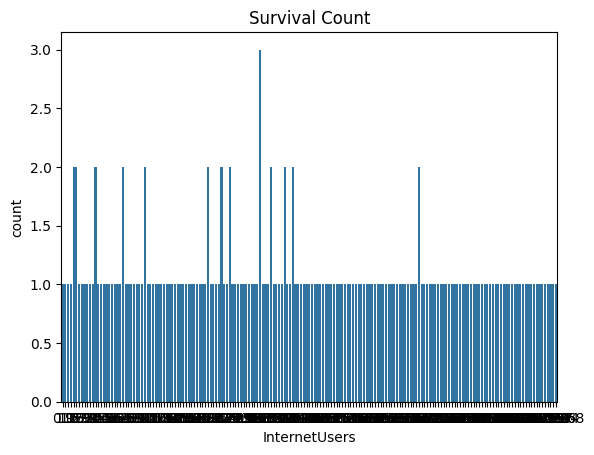

: 

In [ ]:
# Survival Rate Visualization
sns.countplot(x='InternetUsers', data=df)
plt.title("Survival Count")
plt.show()

In [ ]:
import ollama

def generate_insights(df_summary):
    prompt = f"Analyze the dataset summary and provide insights:\n\n{df_summary}"
    response = ollama.chat(model="mistral", messages=[{"role": "user", "content": prompt}])
    return response['message']['content']

# Generate AI Insights
summary = df.describe().to_string()
insights = generate_insights(summary)
print("\n🔹 AI-Generated Insights:\n", insights)

In [ ]:
import gradio as gr

def eda_analysis(file):
    df = pd.read_csv(file.name)
    summary = df.describe().to_string()
    insights = generate_insights(summary)
    return insights

# Create Web Interface
demo = gr.Interface(fn=eda_analysis, inputs="file", outputs="text", title="AI-Powered EDA with Mistral")

# Launch App
demo.launch(share=True)  # Use share=True for Google Colab

* Running on local URL:  http://127.0.0.1:7861


OSError: [WinError 225] Operation did not complete successfully because the file contains a virus or potentially unwanted software: 'c:\\Anitha\\Python311\\Lib\\site-packages\\gradio\\frpc_windows_amd64_v0.3'